
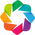

Loading BokehJS ...

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


from bokeh.io import show, output_file, output_notebook
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4
import holoviews as hv
import community

hv.extension('bokeh')

%matplotlib inline
%opts Graph [width=900 height=900]


plt.style.use("ggplot")

output_notebook() 

In [2]:
users = pd.read_csv("SELECT_u_name__ST_X_chap_location__geome.csv", 
                    header = None, names = ["user", "long", "lat"])

In [3]:
edges = pd.read_csv("SELECT_Z_auth_A__Z_auth_B__sum_1__as_cnt.csv")

In [4]:
users.head()

,user,long,lat
0,dollarmapper,11.151678,7.655859
1,muhaammaadd,11.151678,7.655859
2,hauwa_u,11.151678,7.655859
3,kenbayona,-6.766168,39.215414
4,ayebare lucky,0.547058,34.020155


In [5]:
edges.head()

,auth_a,auth_b,cnt
0,--t7tr--,danielzyt,4962
1,--t7tr--,hills95,9744
2,--t7tr--,kiggudde,107
3,--t7tr--,livasa,237
4,--t7tr--,mugabi henry,12


In [6]:
#edges_users = pd.merge(edges, users, 
#         left_on = "auth_a",
#         right_on = "user")\
#.drop("user", axis = 1)

In [7]:
G = nx.Graph()

In [8]:
# Only add edges that would have counts > 1000
edge_tuples = [tuple(x) for x in edges.values 
               if x[-1] >= 0]

In [9]:
G.add_weighted_edges_from(edge_tuples)

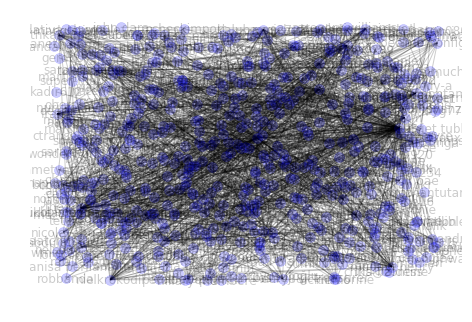

In [10]:
options = {
    "node_color": "blue",
    "node_size": 100,
    "width": 1,
    "alpha": .2
}

nx.draw_random(G, **options, with_labels = True)
plt.savefig("full_user_network.png")

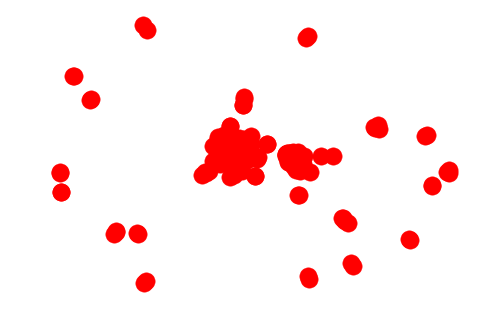

In [11]:
pos = nx.spring_layout(G,scale=2)

nx.draw(G,pos,font_size=8)
plt.show()

In [12]:
plot = figure(title="Youth Street Mapper Connections- Spring Layout", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=1, center=(0,0))
plot.renderers.append(graph)

#output_file("networkx_graph.html")
show(plot)


In [13]:
plot = figure(title="Youth Street Mapper Connections- Shell Layout", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.shell_layout, scale=1, center=(0,0))
plot.renderers.append(graph)

#output_file("networkx_graph.html")
show(plot)


In [14]:
plot = figure(title="Youth Street Mapper Connections- Kamada Kawai", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.kamada_kawai_layout, scale=1, center=(0,0))
plot.renderers.append(graph)

#output_file("networkx_graph.html")
show(plot)

In [15]:
pr = nx.pagerank(G, alpha=0.9)

pd.Series(pr).sort_values(ascending=False)[:int(len(pr) * .1)] 

hills95              0.169541
nabulo carol         0.164457
danielzyt            0.081043
solution oriented    0.028778
brublanc             0.014339
peregrination        0.013793
tars4815             0.013453
michael montani      0.013308
judithkamugisha      0.012791
lani_martin          0.010930
bcnorwich            0.010174
wisniewskin          0.008915
maclondon            0.007583
olatubosun           0.007195
karanjaelijah        0.006400
adriko justice       0.005848
itsukishindo         0.005788
reeseray789          0.005382
mapmaker lp          0.005356
mconant              0.005139
nesim                0.005082
juweni               0.005002
lorenzostucchi       0.004664
russ                 0.004652
asaro92              0.004528
yercizenler          0.004484
smart d              0.004335
anthony acquah       0.003979
klain890             0.003977
naturinda            0.003963
cihanbirtan          0.003797
ndrw6                0.003612
dankpoet             0.003520
scarletazu

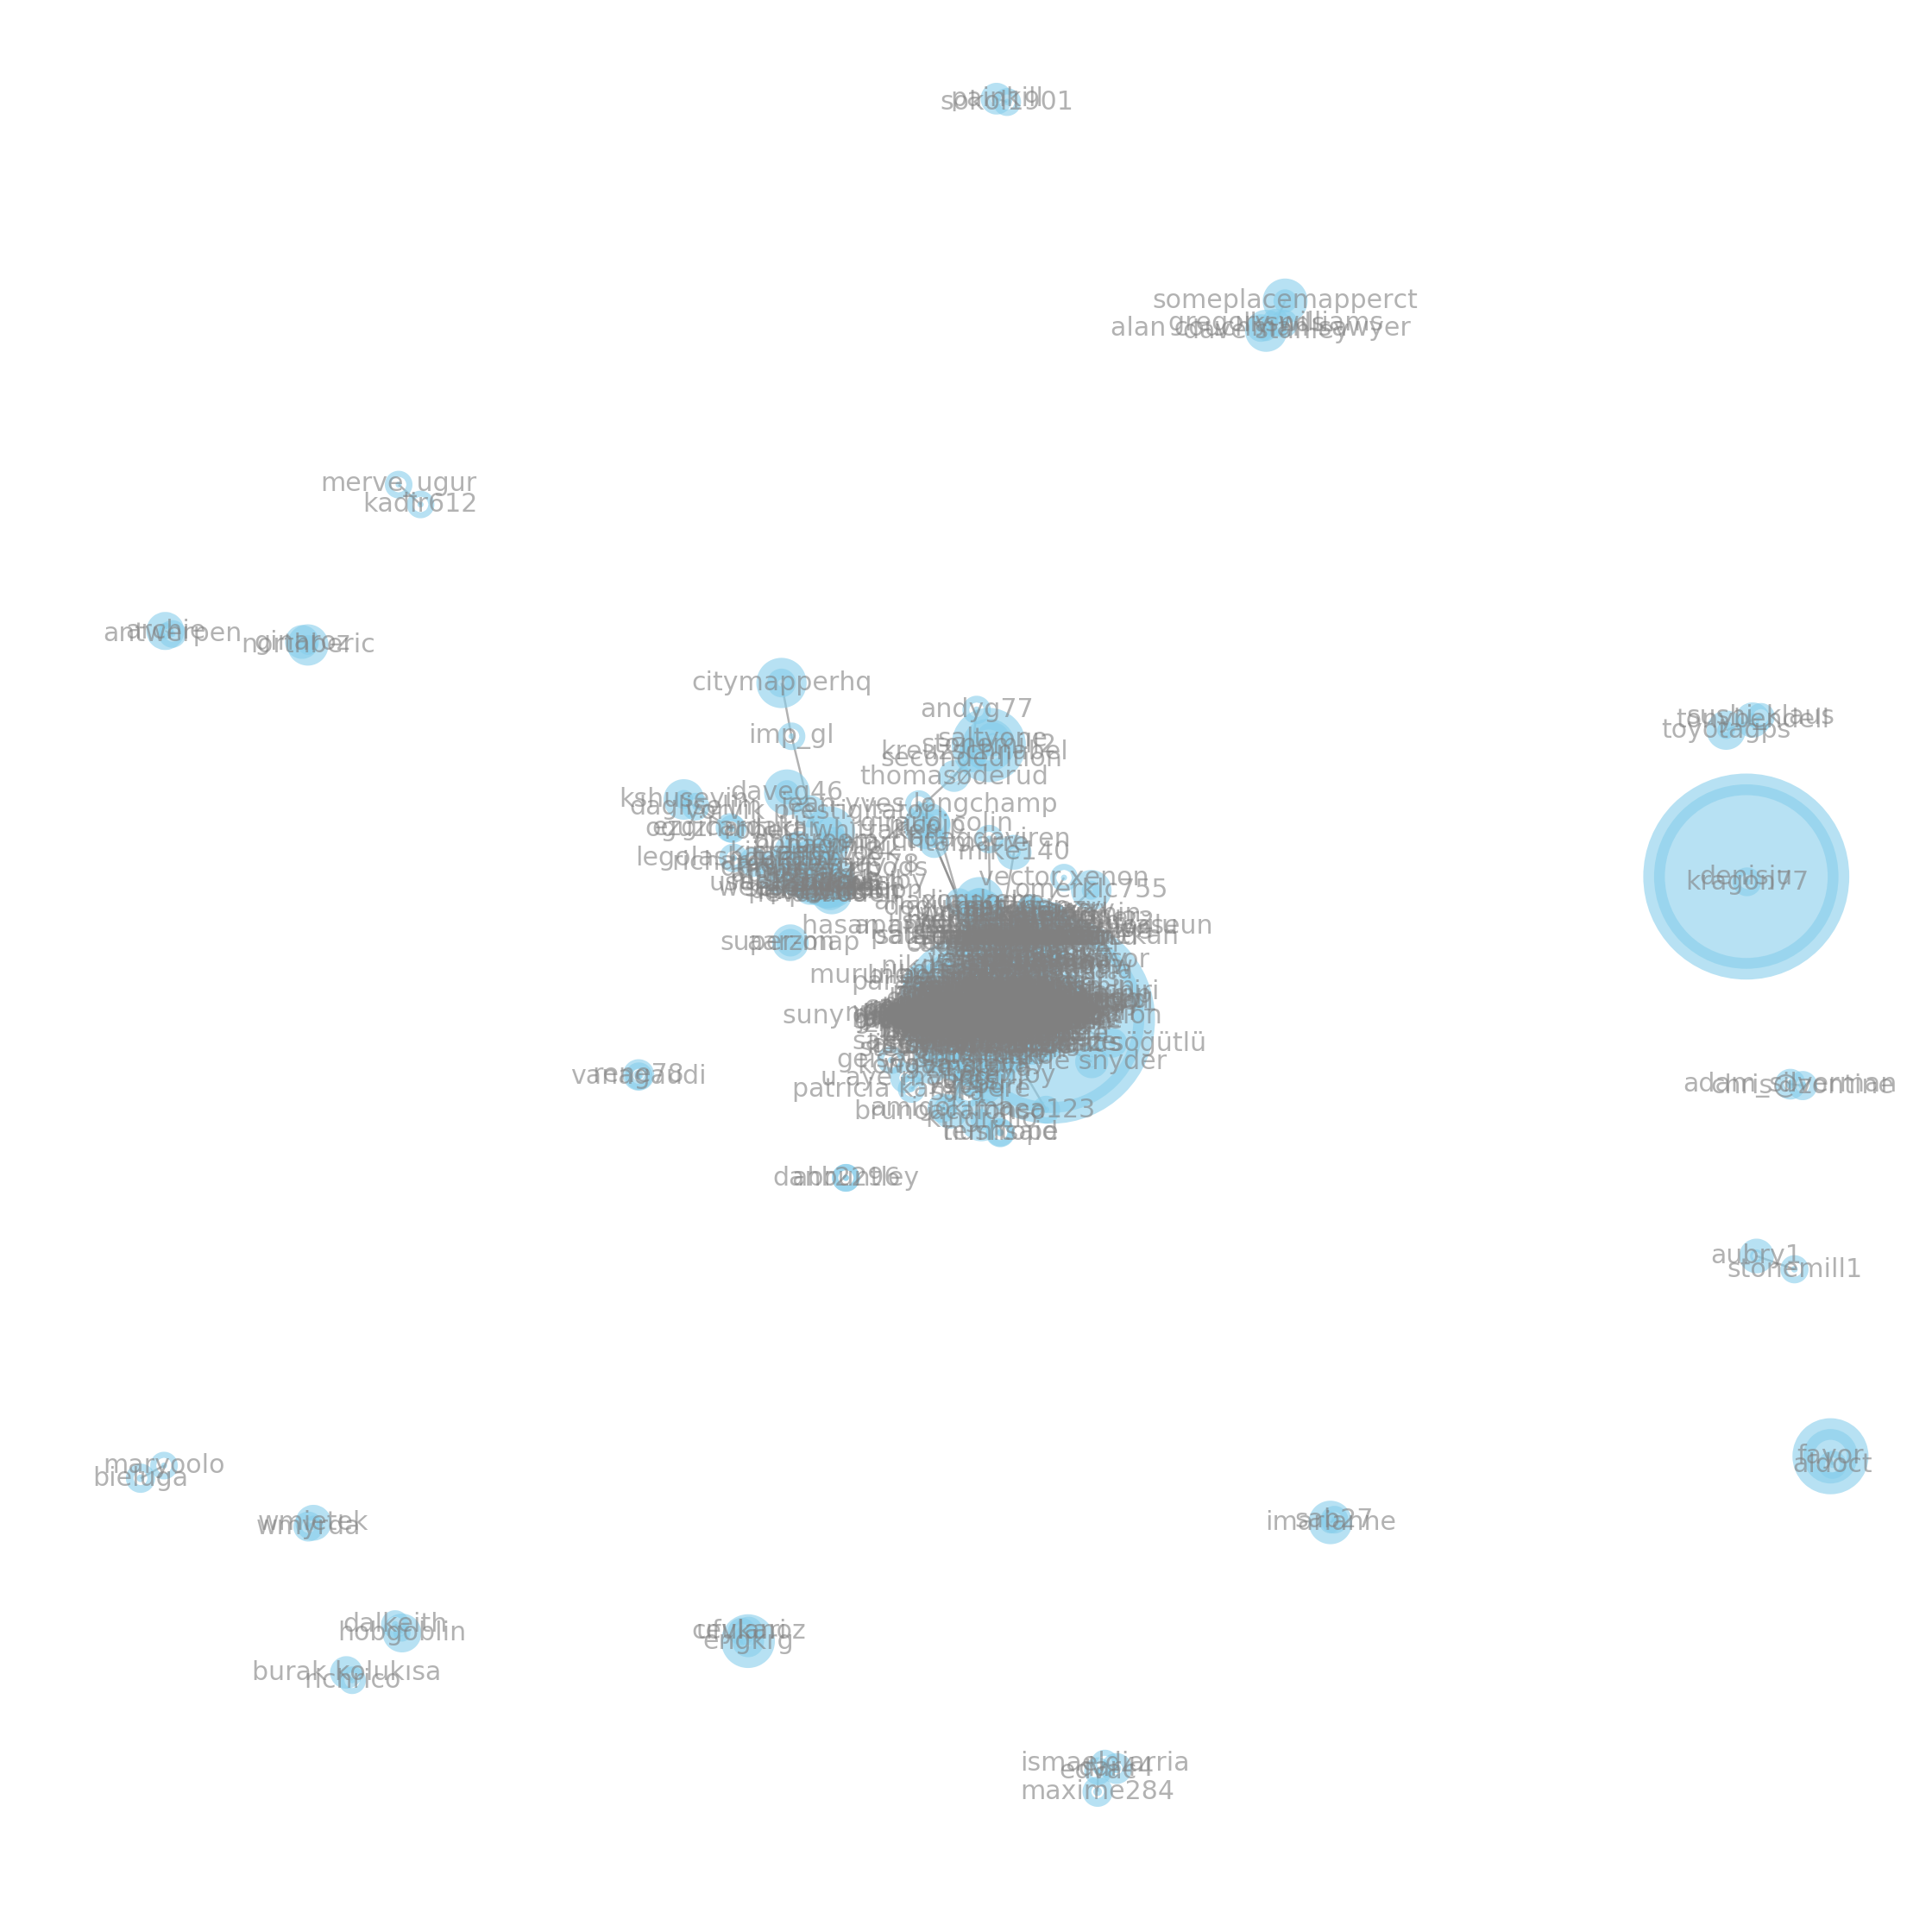

In [16]:
spring = nx.spring_layout(G,scale=2)


fig=plt.figure(figsize=(18, 18), dpi= 120, facecolor='w', edgecolor='k')

nx.draw(G, spring, node_size=pd.Series(pr) * 100000, node_color="skyblue", 
        node_shape="o", alpha=0.6, linewidths=15, font_size=18, 
        font_color="grey", width=1.5, edge_color="grey", with_labels=True, arrows =True)

In [17]:
parts = community.best_partition(G.to_undirected())

values = [parts.get(node) for node in G.to_undirected().nodes()]

In [18]:
partition = community.best_partition(G.to_undirected())
    #drawing
fig=plt.figure(figsize=(18, 18), dpi= 100, facecolor='w', edgecolor='k')
size = float(len(set(partition.values())))
pos = nx.random_layout(G)
count = 0.
for com in set(partition.values()):
     count += 1
     list_nodes = [nodes for nodes in partition.keys()
                                 if partition[nodes] == com]
     nx.draw_networkx_nodes(G, pos, list_nodes, node_size=pd.Series(pr) * 100000,
                                node_color = str(count / size), alpha = .5, with_labels = True)
        

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [19]:
hits_g = pd.Series(nx.hits(G))

hubs = pd.Series(hits_g[0]).sort_values(ascending=False)

authorities = pd.Series(hits_g[1]).sort_values(ascending=False)

In [20]:
plot = Plot(plot_width=800, plot_height=800,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Youth Street Mapper Connections"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=20, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=5, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=5, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

#output_file("interactive_graphs.html")
show(plot)

In [21]:
%%opts Nodes Graph [width=800 height=800 xaxis=None yaxis=None]
%%opts Graph [color_index='circle']
%%opts Graph (node_size=10 edge_line_width=1)
colors = ['#000000']+hv.Cycle('Category20').values
edges_df = edges
fb_nodes = hv.Nodes(users).sort()
fb_graph = hv.Graph((edges, fb_nodes), label='Youthmapper Circles')
fb_graph = fb_graph.redim.range(x=(-0.05, 1.05), y=(-0.05, 1.05))


In [22]:
# Declare abstract edge
import numpy as np
N = 8
node_indices = np.arange(N, dtype=np.int32)
source = np.zeros(N, dtype=np.int32)
target = node_indices

padding = dict(x=(-1.2, 1.2), y=(-1.2, 1.2))

simple_graph = hv.Graph(((source, target),)).redim.range(**padding)
simple_graph

:Graph   [start,end]

In [23]:
%%opts Graph [color_index='Type' edge_color_index='Weight'] (cmap='Set1' edge_cmap='viridis')
import networkx as nx
sizes = pd.Series(pr)
colors = ['#000000']+hv.Cycle('Category20').values
%%opts Graph (node_size=20 edge_line_width=.5)


gr = hv.Graph.from_networkx(G, nx.layout.circular_layout)

gr

:Graph   [start,end]

In [24]:
nx.draw_spectral(G, **options)

ArpackNoConvergence: ARPACK error -1: No convergence (5741 iterations, 0/3 eigenvectors converged)

In [ ]:
auth_a1_net = edges.loc[edges.auth_a == "--t7tr--", 
                       edges.columns[:2]]

In [ ]:
#auth_a1_nodes = (auth_a_net.auth_a.append(auth_a_net.auth_b)).unique()

In [ ]:
auth_a1_nodes

In [ ]:
sub_G = G.subgraph(auth_a1_nodes)

In [ ]:
sub_G.edges()

In [ ]:
nx.draw_random(sub_G, **options, with_labels = True)
plt.savefig("subgraph_with_--t7tr--.png")

In [ ]:
nx.write_gml(G, "youthmappers.gml")